## Main Summary
***
### The Analysis has two main Parts:
##### Part 1: Explanatory Data analysis (EDA)
##### Part 2: Main Data Analysis Using Statistical Methods for Hypothesis Testing
######  Hypothesis Test used:  chi-square test, z test, t test, and Anova.
### Data: NHIS data that is found here: https://www.cdc.gov/nchs/nhis/2019nhis.htm


In [58]:
!pip install researchpy

In [1]:
# Importing modules 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
import researchpy
import scipy.stats as stats
from statsmodels.formula.api import ols
import seaborn as sns

In [2]:
# Reading CSV data from  the source, website
df = pd.read_csv('ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/NHIS/2019/adult19csv.zip', engine ='python')
df.head()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_QRT,RECTYPE,WTFA_A,WTIA_A,HHX,POVRATTC_A
0,4,9,3,0,60000,2,2,122,3,2,...,NaN,NaN,1,1,1,10,13177.008,7601.336,H048109,2.96
1,4,9,3,0,50000,0,2,122,2,1,...,NaN,NaN,1,1,1,10,6140.552,3344.434,H027044,2.97
2,4,12,3,0,65000,1,2,122,2,1,...,NaN,NaN,1,1,1,10,9191.061,6949.498,H058855,4.28
3,4,14,5,0,120000,0,2,122,1,8,...,NaN,NaN,1,1,1,10,7900.035,6446.327,H031993,7.13
4,1,4,1,0,30000,0,2,115,2,1,...,NaN,NaN,1,1,1,10,10875.772,8646.586,H007122,1.13


***
## Part 1: Explanatory Data analysis (EDA)
***

#### Create a new dataframe with relevant columns to use for this analysis

In [3]:

NHIS_data=df[['AGEP_A','SEX_A','EDUC_A','HYPEV_A','CHLEV_A','HEIGHTTC_A','WEIGHTLBTC_A',
             'SMKCIGST_A','ECIGEV_A','SMKECIGST_A','BMICAT_A' ,'HISPALLP_A']].copy()

In [4]:
NHIS_data.shape # check the shape for the new dataframe

(31997, 12)

In [5]:
NHIS_data.head() # check the first 5 rows from the new dataframe

,AGEP_A,SEX_A,EDUC_A,HYPEV_A,CHLEV_A,HEIGHTTC_A,WEIGHTLBTC_A,SMKCIGST_A,ECIGEV_A,SMKECIGST_A,BMICAT_A,HISPALLP_A
0,97,1,7,2,1,71,201,4,2,3,3,3
1,28,2,6,2,2,62,130,2,1,1,2,2
2,72,1,5,1,1,74,215,4,2,3,3,2
3,60,1,7,1,2,72,290,4,2,3,4,1
4,60,1,5,1,1,72,290,1,2,3,4,2


In [6]:
NHIS_data.isnull().sum() # check the dataframe whether it has null value or not

AGEP_A          0
SEX_A           0
EDUC_A          0
HYPEV_A         0
CHLEV_A         0
HEIGHTTC_A      0
WEIGHTLBTC_A    0
SMKCIGST_A      0
ECIGEV_A        0
SMKECIGST_A     0
BMICAT_A        0
HISPALLP_A      0
dtype: int64

In [7]:
NHIS_data.info() # check the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31997 entries, 0 to 31996
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AGEP_A        31997 non-null  int64
 1   SEX_A         31997 non-null  int64
 2   EDUC_A        31997 non-null  int64
 3   HYPEV_A       31997 non-null  int64
 4   CHLEV_A       31997 non-null  int64
 5   HEIGHTTC_A    31997 non-null  int64
 6   WEIGHTLBTC_A  31997 non-null  int64
 7   SMKCIGST_A    31997 non-null  int64
 8   ECIGEV_A      31997 non-null  int64
 9   SMKECIGST_A   31997 non-null  int64
 10  BMICAT_A      31997 non-null  int64
 11  HISPALLP_A    31997 non-null  int64
dtypes: int64(12)
memory usage: 2.9 MB


In [8]:
# used describe() to see the minimum and maximum values for some numeric columns (Continuous Data), such as hieght, weight and height.
# Note: This method is not useful for catagorical data except count.
NHIS_data.describe() 

,AGEP_A,SEX_A,EDUC_A,HYPEV_A,CHLEV_A,HEIGHTTC_A,WEIGHTLBTC_A,SMKCIGST_A,ECIGEV_A,SMKECIGST_A,BMICAT_A,HISPALLP_A
count,31997.000000,31997.000000,31997.000000,31997.000000,31997.000000,31997.000000,31997.000000,31997.000000,31997.000000,31997.000000,31997.000000,31997.000000
mean,52.120136,1.540019,6.352721,1.651874,1.737288,68.717223,247.636622,3.500703,1.992781,2.956121,3.131231,2.185955
std,18.465314,0.501218,7.330429,0.548590,0.612708,8.276404,233.137001,1.296437,0.996953,1.055208,1.283264,0.926603
min,18.000000,1.000000,0.000000,1.000000,1.000000,59.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,36.000000,1.000000,4.000000,1.000000,1.000000,64.000000,150.000000,3.000000,2.000000,3.000000,2.000000,2.000000
50%,53.000000,2.000000,5.000000,2.000000,2.000000,67.000000,179.000000,4.000000,2.000000,3.000000,3.000000,2.000000
75%,67.000000,2.000000,8.000000,2.000000,2.000000,70.000000,215.000000,4.000000,2.000000,3.000000,4.000000,2.000000
max,99.000000,7.000000,99.000000,9.000000,9.000000,99.000000,999.000000,9.000000,9.000000,9.000000,9.000000,7.000000


### Data cleaning
##### We can see some outlier values from the above describe() table. So based on that we need to clean up 
##### some data  or check what the value stands for. For instance,  Height values from 96 to 99 means no data 
##### is provided. For Weight from 996 to 999  means no value is available.

In [9]:
# Cleaning  Height  and Weight 
NHIS_data = NHIS_data[NHIS_data.HEIGHTTC_A <96]
NHIS_data = NHIS_data[NHIS_data.WEIGHTLBTC_A <996]


In [10]:
NHIS_data.describe() # to check if max value for height and weight are reasonable

,AGEP_A,SEX_A,EDUC_A,HYPEV_A,CHLEV_A,HEIGHTTC_A,WEIGHTLBTC_A,SMKCIGST_A,ECIGEV_A,SMKECIGST_A,BMICAT_A,HISPALLP_A
count,29170.000000,29170.000000,29170.000000,29170.000000,29170.000000,29170.000000,29170.000000,29170.00000,29170.000000,29170.000000,29170.000000,29170.000000
mean,52.168769,1.532259,6.341447,1.651834,1.730716,66.774597,176.980836,3.48687,1.978677,2.941172,2.958862,2.185327
std,18.373146,0.498967,6.935526,0.522326,0.583575,3.887764,39.322329,1.27082,0.961402,1.020666,0.819276,0.923264
min,18.000000,1.000000,0.000000,1.000000,1.000000,59.000000,100.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,36.000000,1.000000,4.000000,1.000000,1.000000,64.000000,148.000000,3.00000,2.000000,3.000000,2.000000,2.000000
50%,53.000000,2.000000,5.000000,2.000000,2.000000,67.000000,174.000000,4.00000,2.000000,3.000000,3.000000,2.000000
75%,67.000000,2.000000,8.000000,2.000000,2.000000,70.000000,200.000000,4.00000,2.000000,3.000000,4.000000,2.000000
max,99.000000,2.000000,99.000000,9.000000,9.000000,76.000000,299.000000,9.00000,9.000000,9.000000,4.000000,7.000000


#### Drive (compute)  Body mass index (BMI) variable with Continuous values  using  Height  and Weight values

In [11]:
#  Drive a new continuous variable for BMI named BMIcont
# BMIcont is calcualted using  CDC formula
NHIS_data['BMIcont'] =(NHIS_data['WEIGHTLBTC_A']/(NHIS_data['HEIGHTTC_A'])**2)*703

In [12]:
NHIS_data.head()  # to check if BMIcont is included

,AGEP_A,SEX_A,EDUC_A,HYPEV_A,CHLEV_A,HEIGHTTC_A,WEIGHTLBTC_A,SMKCIGST_A,ECIGEV_A,SMKECIGST_A,BMICAT_A,HISPALLP_A,BMIcont
0,97,1,7,2,1,71,201,4,2,3,3,3,28.030748
1,28,2,6,2,2,62,130,2,1,1,2,2,23.774714
2,72,1,5,1,1,74,215,4,2,3,3,2,27.601351
3,60,1,7,1,2,72,290,4,2,3,4,1,39.326775
4,60,1,5,1,1,72,290,1,2,3,4,2,39.326775


###  EDA for the relationship between smoking status and educational level

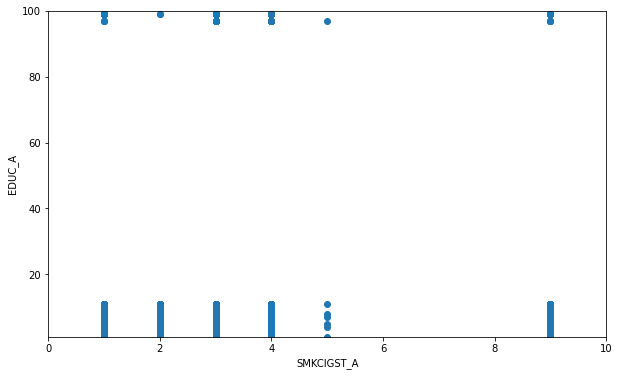

In [13]:
# Plotting a scatter plot for smoking status and educational level
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter( NHIS_data["SMKCIGST_A"], NHIS_data["EDUC_A"])
ax.set_xlabel("SMKCIGST_A")
ax.set_ylabel("EDUC_A")
ax.set_xlim([0, 10])
ax.set_ylim([1, 100])
plt.show()

##### Note: The graph shows us some outlier values, those values seem not right. The categorical 
##### values 97,98,99 for variable Education level are used when data was not provided.
##### The categorical value 9 for Smoking status variable is used when  the data was not provided. 
##### So that the data needs to be cleaned.

***
### Cleaning Smoking Status and Educaation level data and double checking

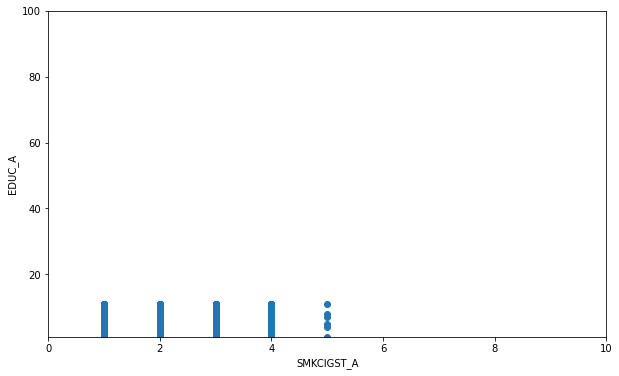

In [14]:
# Based on EDA above the data needs to be clean for the analysis, so drop rows with values 
# EDUC_A >= 97  and drop  SMKCIGST_A =9 because data was not provided and their counts are too small.

NHIS_data= NHIS_data[NHIS_data.EDUC_A <97]
NHIS_data= NHIS_data[NHIS_data.SMKCIGST_A <9]


# Plotting a scatter plot for smoking status and educational level
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(NHIS_data["SMKCIGST_A"],NHIS_data["EDUC_A"])
ax.set_xlabel("SMKCIGST_A")
ax.set_ylabel("EDUC_A")
ax.set_xlim([0, 10])
ax.set_ylim([1, 100])
plt.show()


***
### EDA for Body mass index category by Sex </li>
<li> For Body Mass Index category (BMICAT_A) </li>
<li> 1 = Underweight $\;\;\;\;\;\;$       2 = Healthy weight </li>
<li> 3 = Overweight  $\;\;\;\;\;\;$       4 = Obese  </li>
<li> For Sex_A: 1 =  Male      $\;\;\;\;\;\;$            2 =  Female </li>

In [15]:
 # categorical BMI and sex
Male_group= NHIS_data['BMICAT_A'][NHIS_data['SEX_A'] == 1]
Female_group= NHIS_data['BMICAT_A'][NHIS_data['SEX_A'] == 2]

In [16]:
# For male, BMI category counts
Male_group=Male_group.value_counts(normalize=True, sort=False).mul(100).round(1)
#Male_group

In [17]:
# For female, BMI category counts
Female_group=Female_group.value_counts(normalize=True, sort=False).mul(100).round(1)
#Female_group


In [18]:
# For all adults, BMI category counts
Total = NHIS_data['BMICAT_A'].value_counts(normalize=True, sort=False).mul(100).round(1)
#Total 


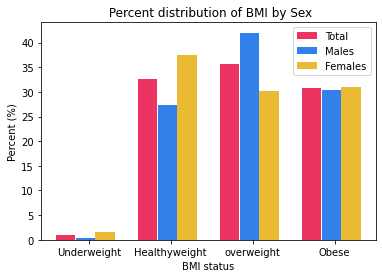

In [19]:
X = np.arange(4)
X1 = ['Underweight','Healthyweight', 'overweight','Obese']
figsize = (40,40)

bar_width = 0.4
Total  = Total[0:4]
Female_BMI = Female_group.values[0:4]
Male_BMI =Male_group.values[0:4]
plt.bar(X-1.2*bar_width,Total,label = 'Total',width = bar_width/1.7,color='#eb3462')
plt.bar(X-bar_width/1.7,Male_BMI,label = 'Males',width = bar_width/1.7,color='#3480eb')
plt.bar(X,Female_BMI,label = 'Females',width = bar_width/1.7,color='#ebba34')

plt.xlabel('BMI status')
plt.ylabel('Percent (%)')
plt.title(' Percent distribution of BMI by Sex')
plt.xticks(X-bar_width/2,X1)
plt.legend()
plt.show()

#### The graph shows that everything is good.
#### Percentage of overweight male is higher than that of female.
****

***
### Body mass Index continous data (BMIcont) visualization

Mean =  27.84101698394719
STD =  5.46754132091302


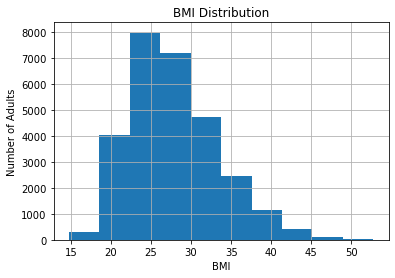

In [20]:
#  BMI histogram, BMIcont= Body mass Index continous data
NHIS_data['BMIcont'].hist()  
plt.xlabel('BMI')
plt.ylabel('Number of Adults')
plt.title('BMI Distribution')
print ('Mean = ', NHIS_data['BMIcont'].mean() ) 
print ('STD = ', NHIS_data['BMIcont'].std() ) 

#### The graph shows that everything is good with Mean BMI is about 28.
***

***
### Cholestrol Level Status Data Distibution Visualization

In [21]:
Chelo_percent=NHIS_data['CHLEV_A'].value_counts(normalize=True).mul(100).round(1)

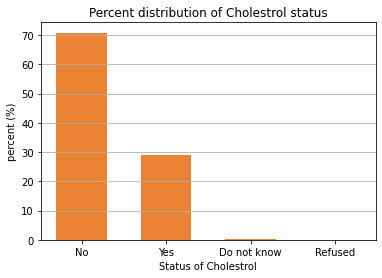

In [22]:
X = np.arange(4)
# 2 ='No', 1='Yes',9='Do not know', 7='Refused'
X_ticks = ['No','Yes','Do not know','Refused']
height = Chelo_percent
#plt.style.use('classic')
plt.bar(X,height,width= 0.6,color = ('#eb8334'))
plt.xticks(X,X_ticks)
plt.title('Percent distribution of Cholestrol status')
plt.xlabel('Status of Cholestrol')
plt.ylabel('percent (%)')
plt.grid(axis='y')
plt.show()

####  The data shows that about 30% of adults has Cholestrol and about 70% of adults has no Cholestrol.
****

 ### Relationship between Cholestrol and Body Mass Index continous data (BMIcont) visualization

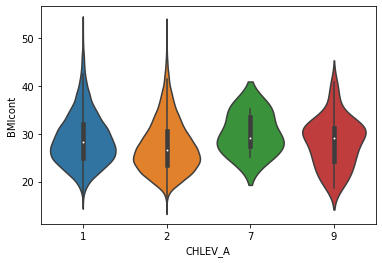

In [23]:
chol_BMI = NHIS_data[['CHLEV_A','BMIcont']]
ax = sns.violinplot(x='CHLEV_A', y='BMIcont', data=chol_BMI)

#    1='Yes' 2 ='No, 7='Refused'',9='Do not know'

#### On Average, adults with no cholestrol have lower BMI than others.
****

***
# Part 2:  Main  Data Analysis Using Statistical Methods and Hypothesis testing
### The previous EDA gives information about highlights, patterns, and visualization about the sample data. 
### Here, Statistical analysis gives inferential analysis and information about the general population (the whole adult population in USA). 
#### Note: researchpy module is used since it is good to analyze survey data.This module is selected after comparing with other tools.
***

### Hypotesis Testing for Education level and Smoking status

<li> Category description for smoking  Status </li>
1 =  Current every day smoker $\;\;\;\;\;\;$    2 =  Current some day smoker $\;\;\;\;\;\;$       
3 =  Former smoker $\;\;\;\;\;\;$               4 =  Never smoker   $\;\;\;\;\;\;$
5 =  Smoker, current status unknown $\;\;\;\;\;\;$ 
  


<li>  Category description for  Education level </li>
00 =  Never attended/kindergarten only  $\;\;\;\;\;\;$    01 =  Grade 1-11     $\;\;\;\;\;\;$   
02 =  12th grade, no diploma  $\;\;\;\;\;\;$ 03 =  GED or equivalent  technical, or vocational program   $\;\;\;\;\;\;$                                                   
04 =  High School Graduate   $\;\;\;\;\;\;$               05 =  Some college, no degree  $\;\;\;\;\;\;$           
06 = Associate degree: occupational, $\;\;\;\;\;\;$       07 = Associate degree: academic  program  $\;\;\;\;\;\;$                                                                
08 = Bachelors degree (Example: BA, AB, BS, BBA)  $\;\;\;\;\;\;$  09 =  Masters degree  $\;\;\;\;\;\;$          
10 =  Professional School degree (Example: MD, DDS, DVM, JD)  $\;\;\;\;\;\;$ 11 =  Doctoral degree    $\;\;\;\;\;\;$ 

 
           
 
                       



*****
#### Contingency (a two-way frequency) table to see the counts of each cell

In [24]:
# to see the counts for each cell
tab=pd.crosstab(NHIS_data["SMKCIGST_A"], NHIS_data["EDUC_A"])
tab

EDUC_A,0,1,2,3,4,5,6,7,8,9,10,11
SMKCIGST_A,,,,,,,,,,,,
1,3,370,70,202,975,594,160,260,309,80,15,13
2,2,77,16,31,238,183,29,79,137,43,6,7
3,7,533,91,240,1772,1248,371,733,1430,665,97,120
4,44,1024,229,214,3554,2643,572,1514,4420,2204,290,462
5,0,1,0,0,1,1,0,1,1,0,0,1


In [25]:
# Creating  a new data frame only for smoking status and education level
dCigEduc =NHIS_data[["SMKCIGST_A", "EDUC_A"]].copy()

In [26]:
#  To create contingency (a two-way frequency) table to see  teh frequency of each cell and total along rows and columns 
researchpy.crosstab(dCigEduc["SMKCIGST_A"], dCigEduc["EDUC_A"])

EDUC_A                                                           \
EDUC_A          0     1    2    3     4     5     6     7     8     9   10   
SMKCIGST_A                                                                   
1               3   370   70  202   975   594   160   260   309    80   15   
2               2    77   16   31   238   183    29    79   137    43    6   
3               7   533   91  240  1772  1248   371   733  1430   665   97   
4              44  1024  229  214  3554  2643   572  1514  4420  2204  290   
5               0     1    0    0     1     1     0     1     1     0    0   
All            56  2005  406  687  6540  4669  1132  2587  6297  2992  408   

                        
EDUC_A       11    All  
SMKCIGST_A              
1            13   3051  
2             7    848  
3           120   7307  
4           462  17170  
5             1      6  
All         603  28382

In [27]:
# This can be used to see proportions for each cell
#researchpy.crosstab(dCigEduc["SMKCIGST_A"], dCigEduc["EDUC_A"],prop= "cell")

In [28]:
# This can be used to see proportions for each row
#researchpy.crosstab(dCigEduc["SMKCIGST_A"], dCigEduc["EDUC_A"],prop= "row")

In [29]:
# This can be used to see proportions for each column
#researchpy.crosstab(dCigEduc["SMKCIGST_A"], dCigEduc["EDUC_A"],prop= "col")

## Hypothesis testing:  Hypothesis 1
#### Does cigarette smoking vary by educational level? Or is there any association between smoking and educational level?
##### Null Hypothesis: There  is no association between smoking and educational level.
##### Alternative Hypothesis: There  is  statistically significant association between smoking and educational level.


###  Method  for Hypothesis testing: Chi-Square Test
#### Both groups (cigarette smoking and educational level) are categorical, so Chi-Square Test of Independence is used.
##### The Chi-Square Test of Independence determines whether there is an association between categorical variables (i.e., whether the variables are independent or related). 
####  Significance Level: choose Alpha = 0.05 (default)

In [30]:
# Chi-Square Test between smoking and educational level

crosstab, result, expected =researchpy.crosstab(dCigEduc["SMKCIGST_A"], dCigEduc["EDUC_A"],
                                             test= "chi-square",              # This is the test used
                                             expected_freqs= True)            # This is to get the expected cell counts.
result

,Chi-square test,results
0,Pearson Chi-square ( 44.0) =,1549.5773
1,p-value =,0.0000
2,Cramer's V =,0.1168



### Summary of the Test result: Significant association  exists
####  p-value < 0.05, so there is statistically significant association between smoking and educational level
#### Hence, in USA, smoking status differs based on educational level.
####  Cramer's V (similar to correlation coefficient) > 0.1, implies that the association is moderate.

******
******
## Hypothesis testing:  Hypothesis 2
### Comparing proportions of only two groups, high school diploma and master's degree to understand the relationship and smoking status in details.
#### Groups: High School diploma vs master degree
#### dependent variable = current every day smoking

In [31]:
dCigEducTable=researchpy.crosstab(dCigEduc["SMKCIGST_A"], dCigEduc["EDUC_A"])
dCigEducTable


EDUC_A                                                           \
EDUC_A          0     1    2    3     4     5     6     7     8     9   10   
SMKCIGST_A                                                                   
1               3   370   70  202   975   594   160   260   309    80   15   
2               2    77   16   31   238   183    29    79   137    43    6   
3               7   533   91  240  1772  1248   371   733  1430   665   97   
4              44  1024  229  214  3554  2643   572  1514  4420  2204  290   
5               0     1    0    0     1     1     0     1     1     0    0   
All            56  2005  406  687  6540  4669  1132  2587  6297  2992  408   

                        
EDUC_A       11    All  
SMKCIGST_A              
1            13   3051  
2             7    848  
3           120   7307  
4           462  17170  
5             1      6  
All         603  28382

#### From the contingency table get values of smokers with  high school diploma, 
#### total with high school diploma, smokers with  masters  degree  and total with masters degree.

In [32]:
# smokers with  high school diploma  Vs Total with high school diploma
HighschooldiplomaSmokervsTotal= [dCigEducTable.iloc[0,4], dCigEducTable.iloc[5,4]]
proportion_HighschooldiplomaSmokervsTotal=dCigEducTable.iloc[0,4]/dCigEducTable.iloc[5,4]
print('[smokers with  high school diploma,Total with high school diploma] =',HighschooldiplomaSmokervsTotal)
print('Proportion =', proportion_HighschooldiplomaSmokervsTotal)

[smokers with  high school diploma,Total with high school diploma] = [975, 6540]
Proportion = 0.14908256880733944


In [33]:
# smokers with  Masters  degree  vs total with masters degree
MastersDegreeSmokervsTotal= [dCigEducTable.iloc[0,9], dCigEducTable.iloc[5,9]]
proportion_MastersDegreeSmokervsTotal=dCigEducTable.iloc[0,9]/dCigEducTable.iloc[5,9]
print('[smokers with  Masters  degree, total with masters degree] =', MastersDegreeSmokervsTotal)
print('Proportion =', proportion_MastersDegreeSmokervsTotal)

[smokers with  Masters  degree, total with masters degree] = [80, 2992]
Proportion = 0.026737967914438502


### Test Method  for proportions
#### The sample shows that proportion of smoker with high school diploma 14.9% (975/6540)  is higher than proportion of smoker with masters degree 2.7% (80/2992])
#####  Can this difference of proportion between the two groups  be generalized to the national level for adult population in USA?
##### Null Hypothesis:In the national level, there  is no difference between the proportion of smokers with high school diplomas  and that of masters degree.
##### Alternative Hypothesis: In the national level, there  is a significant difference between the proportion of smokers with high school diplomas  and that of masters degree.
####  Method  for Hypothesis testing: Z Test
#####  Significance Level: choose Alpha = 0.05 (default)

In [34]:
# for current everyday smokes with education level high school diploma ( no any other higher education level )
SmokerHighschool=HighschooldiplomaSmokervsTotal[0]  # smokers with high school diploma
TotalHighschool=HighschooldiplomaSmokervsTotal[1]  # total number of samples with high school diploma


In [35]:
# for current everyday smokers with Masters degree ( no any other higher education level )
Smokermaster=MastersDegreeSmokervsTotal[0] # smokers with masters degree
TotalMaster=MastersDegreeSmokervsTotal[1]  # total number of samples with Masters degree

#### Test for proportions  using Z test

In [36]:
# Test for proportions  using Z test
smoker_each = np.array([SmokerHighschool, Smokermaster])
Total_each = np.array([TotalHighschool, TotalMaster])
stat, pval = proportions_ztest(smoker_each, Total_each) # Z test for proportion
print("Z value is", stat)
print('The p value is {0:0.3f}'.format(pval))


Z value is 17.668479329500858
The p value is 0.000


#### Summary: There is significant difference between the two groups.
#### That is, since P-value is 0.000, we reject the null hypotesis.
##### In the national level, percentage of smokers with high school diploma is higher than percentage of smokers 
##### with masters degree. 

******
******
## Hypothesis Testing: Hypothesis 3
#### Comparing Body Mass Index (BMI) of Male and Female
##### Is there any difference of BMI by SEX?
##### Null Hypothesis: There is no difference of BMI btween Male and Fmale.
##### Alternative Hypothesis: There is statistically significant difference btween Male BMI and Female BMI.


*******
### Method for Hypothesis testing: T Test
##### The T Test compares two groups averages (means) and tells us if they are different from each other when dependent variable is countinous 
##### BMIcont is countinous data
##### Significance Level: choose Alpha = 0.05 (default).

In [37]:
# grouped the data into two by sex

group1= NHIS_data['BMIcont'][NHIS_data['SEX_A'] == 1]  # group forming and labeling 
group2=NHIS_data['BMIcont'][NHIS_data['SEX_A'] == 2]   # group forming and labeling 
summary, result= researchpy.ttest(group1,group2, group1_name= "Male", group2_name= "Female")   # used T test
summary   # output for summary

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Male,13263.0,28.047972,4.776015,0.041471,27.966683,28.129261
1,Female,15119.0,27.659468,6.003290,0.048823,27.563768,27.755168
2,combined,28382.0,27.841017,5.467541,0.032454,27.777405,27.904629


In [38]:
result[0:4]    # main result for the T test

,Independent t-test,results
0,Difference (Male - Female) =,0.3885
1,Degrees of freedom =,28380.0000
2,t =,5.9763
3,Two side test p value =,0.0000


### Summary of the Test result: There is a statistically significant difference
##### That is, since  p value = 0.0000, we reject the null hypotesis.
##### The above summary shows that there is a statistically significant difference between BMI mean value of male adults and BMI mean value of Female adults in the national level.
##### Summary Table shows the mean, STD and 95% confidence interval.

******
*******

## Hypothesis Testing : Hypothesis 4
####  To study if body mass index (BMI) has any effect on hypertension
#### Is there any relationship btween hypertension and body mass index (BMI)?
##### Null Hypothesis: There is no relationship btween hypertension and BMI.
##### Alternative Hypothesis: There is a relationship btween them.



***
#### Method of Testing: T Test
##### Significance Level: choose Alpha = 0.05 (default).


In [39]:
# To check if BMI and Hypertension have any relationship, taken  'yes' or 'No' for hypertension
Hyp_group1 = NHIS_data['BMIcont'][NHIS_data['HYPEV_A'] == 1]
Hyp_group2 = NHIS_data['BMIcont'][NHIS_data['HYPEV_A'] == 2]
# DO the T test
summary, result= researchpy.ttest(Hyp_group1,Hyp_group2, group1_name= " Hypertension-Yes",group2_name= " Hypertension-No")
summary

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Hypertension-Yes,10049.0,29.393471,5.558225,0.055447,29.284785,29.502158
1,Hypertension-No,18309.0,26.989492,5.226111,0.038623,26.913787,27.065197
2,combined,28358.0,27.841371,5.468330,0.032473,27.777723,27.905019


In [40]:
result[0:4]

,Independent t-test,results
0,Difference ( Hypertension-Yes - Hypertension-...,2.4040
1,Degrees of freedom =,28356.0000
2,t =,36.2197
3,Two side test p value =,0.0000


### Summary of the Test result
##### Based on the result (p value = 0.000), BMI has statistically significant impact on hypertension. 
#####  Hence, we reject the null hypotesis.
##### The analysis shows that  the mean BMI of adults with Hypertention (29.37) is higher than the mean 
#####  BMI of adults with no Hypertention (26.99), and this difference can be generalized to the national level.

*****
******
## Hypothesis Testing: Hypotesis 5    

###  To compare the relationship between Body mass index (BMI) and Race.
#### Is there any difference between body mass index (BMI) over different Races?
##### Null  Hypothesis: There is no difference between BMI and Race.
##### Alternative  Hypothesis: There is difference between them.

### Method for Hypothesis testing: ANOVA Test
##### Analysis of Variance(ANOVA) is used to analyze the differences among group means in a sample 
##### when the groups are more than two. 
##### In this sample there is one dependant variable BMI which is continous data and there is another 
##### categorical variable Race with different categories.
##### Significance Level: choose Alpha = 0.05 (default).

#### Category description For RACE
01= Hispanic  &ensp; &nbsp;  &nbsp; 02 = NH White only   &ensp; &nbsp;  &nbsp;
03 = NH Black/African American only  &ensp; &nbsp;  &nbsp;   04 = NH Asian only  &ensp; &nbsp;  &nbsp; 
&ensp; &nbsp;  &nbsp; \
 05 = NH AIAN only   &ensp; &nbsp;  &nbsp;      06 =  NH AIAN and any other group  &ensp; &nbsp;  &nbsp;
 07 =  Other single and multiple races   &ensp; &nbsp;  &nbsp; 97 =  Refused     &ensp; &nbsp;  &nbsp;   
98 = Not Ascertained  &ensp; &nbsp;  &nbsp; 99 = Do not Know  &ensp; &nbsp;  &nbsp;

In [41]:
NHIS_RACE=NHIS_data[['HISPALLP_A','BMIcont']].copy()


In [42]:
NHIS_RACE.head()

,HISPALLP_A,BMIcont
0,3,28.030748
1,2,23.774714
2,2,27.601351
3,1,39.326775
4,2,39.326775


In [43]:
NHIS_RACE= NHIS_RACE[NHIS_RACE.HISPALLP_A < 97] # clean the data for  unknown race

In [44]:
NHIS_RACE=NHIS_data[['HISPALLP_A','BMIcont']].copy()

NHIS_RACE['HISPALLP_A'] = NHIS_RACE['HISPALLP_A'].astype('category')

# summary of the data for each race group
researchpy.summary_cont(NHIS_RACE['BMIcont'].groupby(NHIS_RACE['HISPALLP_A']))


,N,Mean,SD,SE,95% Conf.,Interval
HISPALLP_A,,,,,,
1,3587,28.6143,5.3987,0.0901,28.4375,28.7910
2,19666,27.6890,5.3900,0.0384,27.6136,27.7643
3,3006,29.3582,5.9131,0.1079,29.1467,29.5697
4,1412,24.6996,3.9914,0.1062,24.4912,24.9080
5,183,28.7349,5.7095,0.4221,27.9021,29.5676
6,225,28.2747,5.4912,0.3661,27.5533,28.9961
7,303,27.2812,5.3456,0.3071,26.6769,27.8855


### The mean,  SD and 95% confidence interval show differences of BMI among races. To generalize this difference, we should use one-way Anova test.

In [45]:
# One way Anova test

model = ols('BMIcont ~ HISPALLP_A', data=NHIS_RACE).fit() # Anova Test using OLS, Ordinary least-squares (OLS) regression 
anov_table = sm.stats.anova_lm(model,type=2)
print(anov_table)
print()

print('p value is {0:3f}'.format(anov_table.iloc[0,4]))

                 df         sum_sq      mean_sq           F         PR(>F)
HISPALLP_A      6.0   23736.444333  3956.074056  136.116877  1.144048e-170
Residual    28375.0  824685.399436    29.063803         NaN            NaN

p value is 0.000000


### Summary of Test: The mean of BMI significantly differs across races.
##### Based on the Anova test the F-ditribution shows that the p-value is statisticaly significant so we reject the null hypothesis.
##### The resul shows that the means of BMI for different races is significantly different for adult population in USA.

In [46]:
# To see the results in detials
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BMIcont   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     136.1
Date:                Sun, 15 Nov 2020   Prob (F-statistic):          1.14e-170
Time:                        20:29:43   Log-Likelihood:                -88085.
No. Observations:               28382   AIC:                         1.762e+05
Df Residuals:                   28375   BIC:                         1.762e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          28.6143      0.090    317.887      0.000      28.438      28.791
HISPALLP_A[T.2]    -0.9253      0.098     -9.453      0.000      -1.117      -0.733
HISPALLP_A[T.3]     0.7439      0.133      5.581      0.000       0.483       1.005
HISPALLP_A[T.4]    -3.9147      0.169    -23.113      0.000      -4.247      -3.583
HISPALLP_A[T.5]     0.1206      0.409      0.295      0.768      -0.680       0.921
HISPALLP_A[T.6]    -0.3395      0.371     -0.916      0.359      -1.066       0.387
HISPALLP_A[T.7]    -1.3330      0.323     -4.133      0.000      -1.965      -0.701
==============================================================================
Omnibus:                     2072.509   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2561.643
Skew:                           0.705   Prob(JB):                         0.00
Kurtosis:                       3.425   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

****
### Note: 
##### The above result shows the comparision of BMI among races using Hispanic (T.1) as a reference.
There is significant difference of BMI between the following with p-value almost 0. \
Hispanic (T.1) and NH White only (T.2)     
Hispanic (T.1) and NH Black/African American only (T.3)    
Hispanic (T.1) and NH Asian only (T.4) 




***
# ENd of Project 2 
****